# Predicción de la Radiación Solar

Vamos a intentar predecir la radiación solar dependiendo distintos factores como la hora del día, la temperatura, presión, etc..

Pueden encontrar este dataset en Kaggle: 

https://www.kaggle.com/dronio/SolarEnergy

Tener una herramienta que prediga la cantidad de radiación solar que habrá, dependiendo diversos factores, nos permitirá ver si es rentable o no invertir en paneles solares para alimentar nuestros aparatos electros hogareños, que cantidad de energía vamos a tener disponible durante el año y distintas ventajas relacionadas con el tema que un especialista en el área podria descubrir.

In [1]:
#Importamos las librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargamos los datos
df_SolarRad = pd.read_csv("Dataset/SolarPrediction.csv")

In [3]:
df_SolarRad.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
df_SolarRad.shape

(32686, 11)

# Preprocesamiento

Vamos a trabajar sobre la columna **Time**, vamos a tomar los horarios y transformarlos en nuevos features (**Morning, Afternoon, Night** y **EarlyMorning**)

In [5]:
#Cortamos los datos de la columna tomando los primeros 2 valores y transformandolos en enteros
df_SolarRad["Time"] = df_SolarRad.Time.str.slice(stop=2).astype(int)

In [6]:
df_SolarRad["Time"].describe()

count    32686.000000
mean        11.557425
std          6.912034
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: Time, dtype: float64

Vemos que los datos se tomaron en distintos horarios.

Vamos a realizar la transformación a nuevos features 

In [7]:
#Creamos la nueva columna y la llenamos con valores Booleanos en caso de que cumpla la condicion
df_SolarRad["Morning"] = (df_SolarRad["Time"] >= 6) & (df_SolarRad["Time"] <= 12)
df_SolarRad["Afternoon"] = (df_SolarRad["Time"] >= 13) & (df_SolarRad["Time"] <= 19)
df_SolarRad["Night"] = (df_SolarRad["Time"] >= 20) & (df_SolarRad["Time"] <= 23)
df_SolarRad["EarlyMorning"] = (df_SolarRad["Time"] >= 0) & (df_SolarRad["Time"] <= 5)

In [8]:
#Vemos que se crearon correctamente
df_SolarRad.head(2)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Morning,Afternoon,Night,EarlyMorning
0,1475229326,9/29/2016 12:00:00 AM,23,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,False,False,True,False
1,1475229023,9/29/2016 12:00:00 AM,23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,False,False,True,False


Para que esto funcione tenemos que transformar los valores Booleanos a númericos, para esto vamos a utilizar una herramienta muy útil de la librería sklearn: LabelEncoder

Esta herramienta nos permite transformar y etiquetar categorías a variables numéricas. Generalmente se utiliza cuando tenemos un problema de Clasificación sobre nuestra variable objetivo (**y**), pero en este caso nos va a ser útil.

Es recomendable aprender mas sobre esta técnica: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [9]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()
#Utilizamos fit_transform ya que entrenamos y aplicamos el cambio sobre el mismo conjunto de datos
df_SolarRad['Morning'] = lab_enc.fit_transform(df_SolarRad['Morning'])
df_SolarRad['Afternoon'] = lab_enc.fit_transform(df_SolarRad['Afternoon'])
df_SolarRad['Night'] = lab_enc.fit_transform(df_SolarRad['Night'])
df_SolarRad['EarlyMorning'] = lab_enc.fit_transform(df_SolarRad['EarlyMorning'])

In [10]:
df_SolarRad[["Time","Morning","Afternoon","Night","EarlyMorning"]].tail()

,Time,Morning,Afternoon,Night,EarlyMorning
32681,0,0,0,0,1
32682,0,0,0,0,1
32683,0,0,0,0,1
32684,0,0,0,0,1
32685,0,0,0,0,1


Vemos que el cambio se aplico correctamente, a la hora 0 tenemos el valor 1 que nos indica que es de madrugada 

Vamos a hacer lo mismo con las columnas **TimeSunRise** y **TimeSunSet**

In [11]:
df_SolarRad["TimeSunRise"] = df_SolarRad.TimeSunRise.str.slice(stop=2).astype(int)
df_SolarRad["TimeSunSet"] = df_SolarRad.TimeSunSet.str.slice(stop=2).astype(int)

In [12]:
df_SolarRad["TimeSunRise"].describe()

count    32686.0
mean         6.0
std          0.0
min          6.0
25%          6.0
50%          6.0
75%          6.0
max          6.0
Name: TimeSunRise, dtype: float64

In [13]:
df_SolarRad["TimeSunSet"].describe()

count    32686.000000
mean        17.347886
std          0.476307
min         17.000000
25%         17.000000
50%         17.000000
75%         18.000000
max         18.000000
Name: TimeSunSet, dtype: float64

Vemos que los datos de estas dos columnas no varían, asique no van a sumar valor aplicarlos al modelo

In [14]:
#Eliminamos las columnas
df_SolarRad = df_SolarRad.drop(columns=["TimeSunSet","TimeSunRise"])

Veamos si tenemos **outliers**

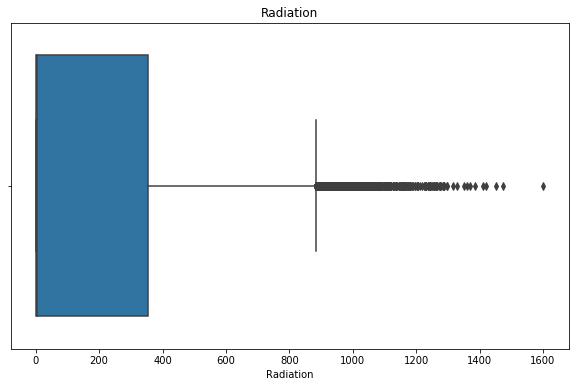

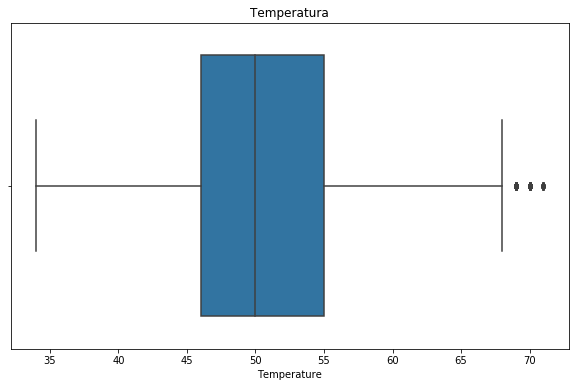

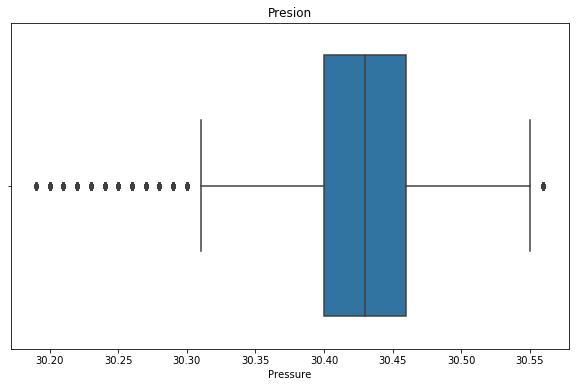

In [15]:
plt.figure(1, figsize=(10,6)) 
plt.title("Radiation") 
sns.boxplot(df_SolarRad["Radiation"]) 

plt.figure(2, figsize=(10,6))
plt.title("Temperatura")
sns.boxplot(df_SolarRad["Temperature"])

plt.figure(3, figsize=(10,6)) 
plt.title("Presion")
sns.boxplot(df_SolarRad["Pressure"])

Vemos que son pocos. Podemos quitarlos a medida que entrenamos los modelos y probar como afecta al **score** de nuestro modelo

Vamos a visualizar la correlación de los datos con nuestro objetivo **Radiation**, esto nos va a permitir seleccionar que features son mas relevante para utilizarlas con nuestro modelo

Vamos a generar un mapa de calor utilizando Seaborn: https://seaborn.pydata.org/generated/seaborn.heatmap.html

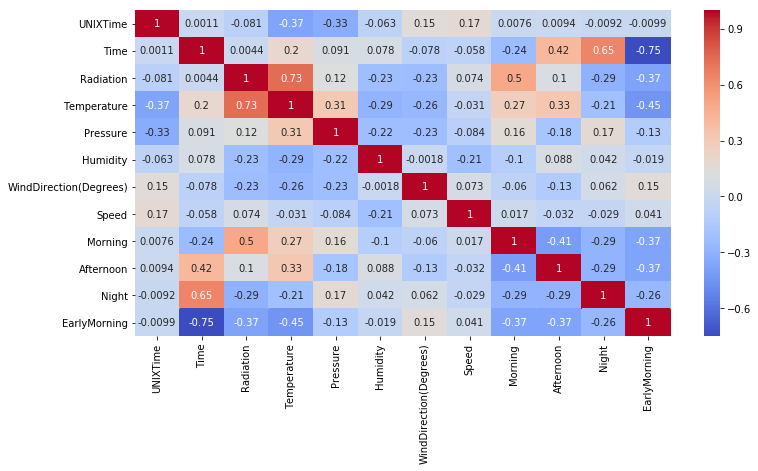

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_SolarRad.corr(),cmap='coolwarm',annot=True)

Vamos a filtrar el dataset con las columnas que tengan correlación alta o positiva

In [17]:
X = df_SolarRad[["Temperature","Pressure","Morning","Afternoon"]] #Nuestros features mas relevantes
y = df_SolarRad["Radiation"] #Separamos nuestro objetivo

# Machine Learning

Vamos a probar distintos modelos de **regresión** a ver como funcionan nuestros modelos. Inicialmente vamos a cargar nuestros modelos con los **hiperparametros** por defecto, después vamos a pasar a la etapa de optimización.

In [18]:
#Importamos librerias para evaluar nuestros modelos
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Primero vamos a dividir nuestro dataset en 4 partes:
 - X_train: Datos para entrenar el modelos 
 - y_train: Nuestro objetivo a predecir que utilizaremos para entrenar el modelo
 - X_test: Conjunto de datos al cual le aplicaremos la predicción
 - y_test: Conjunto de datos objetivo con las que compararemos los resultados de la predicción para ver que tan bien funciona el modelo
 
**y_pred**: Es el resultado del modelo aplicado al conjunto de X_test que se va a comparar con **y_test** para medir el error del modelo

Generalmente la divición se hace un 80%(train), 20%(test):

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Linear Regression

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn.linear_model import LinearRegression

regression_linear = LinearRegression()

regression_linear.fit(X_train, y_train) #Entrenamos el modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
y_pred = regression_linear.predict(X_test) #Aplicamos la prediccion

Grafiquemos el valor de nuestra **predicción** (y_pred) y los **valores reales** (relación 1:1)

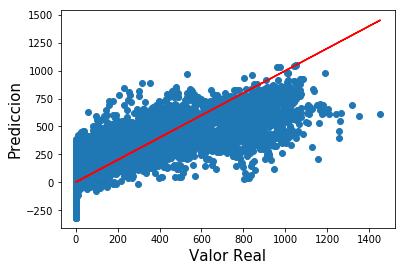

In [22]:
plt.scatter(y_test,y_pred) #Valores predichos 
plt.plot(y_test, y_test, 'r') #Nuestro valor real
plt.xlabel('Valor Real', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15)  
plt.show()

La linea roja son nuestros valores reales y los puntos azules nuestras predicciones.
Vemos que los puntos siguen el patrón de la linea roja, pero una gran cantidad cae fuera. 

Vamos a medir el error en nuestras predicciones con el **RMSE**

In [23]:
#Aplicamos la raiz cuadrada (np.sqrt) al MSE para obtener el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print("RMSE: ", rmse)

RMSE:  186.3129615797905


Vemos que nuestro **error mínimo** es de **186.3**, esto quiere decir que nuestra predicción esta alejada 186 watts por metro^2 (unidad de medida de la radiación solar), del **valor real**.

Veamos como nos dio el R^2 de nuestro modelo

In [24]:
print("R^2: ", r2_score(y_test, y_pred))

R^2:  0.6571647845101978


Es un valor bastante bajo, hay que tener en cuenta que aplicamos el modelo por defecto sin tunear los hiperparametros o realizar algún tipo de optimización.

Vamos a probar otros modelos de regresión a ver si esto mejora

### Decision Tree Regressor

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [25]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(random_state =12)

tree_reg.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=12, splitter='best')

In [26]:
y_pred = tree_reg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  158.48820680470152


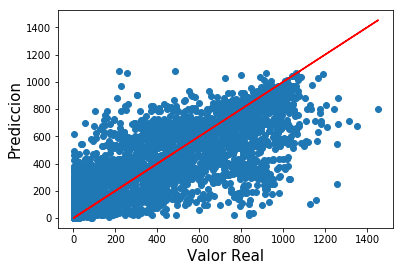

In [28]:
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Valor Real', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15)  
plt.show()

In [29]:
print("R^2: ", r2_score(y_test, y_pred))

R^2:  0.7519191791228433


Vemos que con el modelo de **Decision Tree** bajo nuestro **RMSE** a **158**, y nuestro **score** subió a 75, esto es una buena señal de mejora.

Sigamos viendo ejemplos con otros modelos

### Random Forest

Ver hiperparametros del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

En este caso ya definimos el hiperparamentro **n_estimators**, el cual es la cantidad de árboles a entrenar dentro de nuestro bosque

In [30]:
from sklearn.ensemble import RandomForestRegressor

regression_RF = RandomForestRegressor(n_estimators = 200, random_state =12)
regression_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=12, verbose=0, warm_start=False)

In [31]:
y_pred = regression_RF.predict(X_test)

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  158.29702599246846


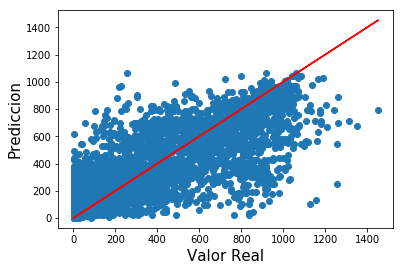

In [33]:
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Valor Real', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15)  
plt.show()

In [34]:
r2_score(y_test, y_pred)

0.7525173269338505

Vemos que el RMSE y el R2 no cambiaron

# Optimizacion

Existen varias técnicas para optimizar nuestros modelos
- Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html
- Randomized Search: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- Gradient Descent: Es mas utilizado en **Deep Learning**
- Grid Search: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Vamos a utilizar este ultimo

### GridSearch

Esta técnica se basa en **comparar los hiperparametros** del modelo, cargados en una grilla que nosotros definimos, Grid Search nos va a brindar los mejores parámetros a utilizar

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
#Cargamos la grilla con los hiperparametros a comparar
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]}

In [37]:
tree_reg = DecisionTreeRegressor(random_state=12)
#Pasamos los parametros a GridSearch 
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)

In [38]:
#Entrenamos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=12, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [4, 6, 8, 10, 12], 'max_features': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [39]:
#Vemos los resultados de GridSearch 
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008833,0.005912,0.001925,0.000670,4,1,"{'max_depth': 4, 'max_features': 1}",0.653393,0.671115,0.680764,...,0.665542,0.012706,20,0.674106,0.667308,0.664987,0.673640,0.667006,0.669409,0.003734
1,0.007422,0.000848,0.001465,0.000063,4,2,"{'max_depth': 4, 'max_features': 2}",0.689333,0.707191,0.708040,...,0.696463,0.011131,18,0.701299,0.697497,0.697161,0.702525,0.697861,0.699269,0.002204
2,0.008156,0.000063,0.001517,0.000206,4,3,"{'max_depth': 4, 'max_features': 3}",0.686761,0.703824,0.713496,...,0.694439,0.014490,19,0.701760,0.698445,0.695875,0.699528,0.697967,0.698715,0.001931
3,0.008764,0.000164,0.001446,0.000030,4,4,"{'max_depth': 4, 'max_features': 4}",0.701328,0.718566,0.722075,...,0.710596,0.009385,16,0.715931,0.712392,0.711428,0.717003,0.714144,0.714180,0.002088
4,0.007293,0.001890,0.001563,0.000121,6,1,"{'max_depth': 6, 'max_features': 1}",0.694150,0.710773,0.714583,...,0.702836,0.010210,17,0.711741,0.707261,0.704525,0.708694,0.707992,0.708042,0.002328


In [40]:
print("El mejor score es:", grid_search.best_score_) 
print("Mejores parametros entcontrados:\n", grid_search.best_estimator_)

El mejor score es: 0.7532833050011407
Mejores parametros entcontrados:
 DecisionTreeRegressor(criterion='mse', max_depth=12, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=12, splitter='best')


Vemos que para este conjunto de datos, el mejor score es **75** con la métrica de **R2**

Vamos a utilizar el mejor estimador que nos brindo GridSearch

In [41]:
optimised_Tree = grid_search.best_estimator_

In [42]:
#Tomamos un ejemplo del conjunto de test
test_predict= X_test[50:51]
test_predict

,Temperature,Pressure,Morning,Afternoon
5823,51,30.4,0,1


In [43]:
print("Radiacion solar:",optimised_Tree.predict(test_predict), "watts por metro^2")

Radiacion solar: [174.29761905] watts por metro^2
